# Generate alpha factor values for news sentiments - FINAL SUBMIT

In [47]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
import numpy as np
import pandas as pd
from pandas import date_range
import matplotlib.pyplot as plt
import datetime
import time
import dill
import pyfolio as pf
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr

# Preparing the news table for join

In [50]:
news0=pd.read_csv('./data/news0to10000.csv')[0:10000]
news1=pd.read_csv('./data/news10000to20000headline.csv')[10000:20000]
news2=pd.read_csv('./data/news20000to30000headline.csv')[20000:30000]
news3=pd.read_csv('./data/news30000to40000headline.csv')[30000:40000]
news4=pd.read_csv('./data/news40000to50000.csv')[40000:50000]
news5=pd.read_csv('./data/news50000to60000headline.csv')[50000:60000]
news6=pd.read_csv('./data/news60000to70000headline.csv')[60000:70000]
news7=pd.read_csv('./data/news70000to80000headline.csv')[70000:80000]
news8=pd.read_csv('./data/news80000to90000headline.csv')[80000:90000]
news9=pd.read_csv('./data/news90000to100000headline.csv')[90000:100000]
news10=pd.read_csv('./data/news100000to110000headline.csv')[100000:110000]
news11=pd.read_csv('./data/news110000to120000.csv')[110000:120000]
news12=pd.read_csv('./data/news120000to130000.csv')[120000:130000]
news13=pd.read_csv('./data/news130000to140000.csv')[130000:140000]
news14=pd.read_csv('./data/news140000to150000.csv')[140000:150000]
news15=pd.read_csv('./data/news150000to160000.csv')[150000:160000]
news16=pd.read_csv('./data/news160000to170000.csv')[160000:170000]
news17=pd.read_csv('./data/news170000to180000.csv')[170000:180000]
news18=pd.read_csv('./data/news180000to200000.csv')[180000:200000]
news19=pd.read_csv('./data/news200000to250000.csv')[200000:250000]
news20=pd.read_csv('./data/news250000to300000.csv')[250000:300000]
news21=pd.read_csv('./data/news300000to350000.csv')[300000:350000]
news22=pd.read_csv('./data/news350000to400000.csv')[350000:400000]
news23=pd.read_csv('./data/news400000to500000.csv')[400000:450000]
news24=pd.read_csv('./data/news450000to550000.csv')[450000:550000]
news25=pd.read_csv('./data/news550000to650000.csv')[550000:650000]
news26=pd.read_csv('./data/news650000to694898.csv')[650000:694898]
news27=pd.read_csv('./data/news694898to750000.csv')[694898:750000]
news28=pd.read_csv('./data/news750000to850000.csv')[750000:850000]
news29=pd.read_csv('./data/news850000to950000.csv')[850000:950000]
news30=pd.read_csv('./data/news950000to1050000.csv')[950000:1050000]
# news31=pd.read_csv('./data/news1050000to1100000.csv')[1050000:1100000]
news32=pd.read_csv('./data/news1100000to1150000.csv')[1100000:1150000]
news33=pd.read_csv('./data/news1150000to1250000.csv')[1150000:1250000]
news34=pd.read_csv('./data/news1250000to1350000.csv')[1250000:1350000] #correct as well
news35=pd.read_csv('./data/news1250000to1418418.csv')[1250000:1418418] #correct as well
news36=pd.read_csv('./data/news1418418and1418419.csv')[1418418:1418419]

frames = [news0, news1, news2, news3, news4, news5, \
          news6, news7, news8, news9, news10,\
          news11, news12, news13, news14, news15,\
          news16, news17, news18, news19, news20,\
          news21, news22, news23, news24, news25,\
          news26, news27, news28, news29, news30,\
          news32, news33, news34, news35, news36,\
          #news31
          ]

news = pd.concat(frames).drop_duplicates(keep='first')
news.to_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv', header=True)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [51]:
news30[1050000+3:1050000+6]
news30[1100000-6:1100000-3]
news32[1050000+3:1050000+6]
news32[1100000-6:1100000-3]

,Unnamed: 0,date,asset,headline,message_body,score


## Visual examine the periodicity of news sentiment periodicity and propagation

In [ ]:
news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
news.tail()

In [ ]:
news = news.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
news = news.drop(columns=['headline','message_body'])

In [ ]:
news['utc']=pd.DatetimeIndex(news['date']).tz_localize(None)
news['year']=pd.DatetimeIndex(news['utc']).year
news['day']=pd.DatetimeIndex(news['utc']).day
news['weekday']=pd.DatetimeIndex(news['utc']).weekday
news['hour']=pd.DatetimeIndex(news['utc']).hour
# news['date_string']=pd.DatetimeIndex(news['date']).strftime('%Y-%m-%d')
# news['date_from_string']=pd.to_datetime(news['date_string'], format='%Y-%m-%d', errors='coerce')
news['date']=pd.DatetimeIndex(news['date']).round('D').date
news.head()

Options to localize if using Alphalens library later (instead of my own functions)
news['utc_localize']=pd.DatetimeIndex(news['date']).tz_localize('utc', ambiguous='infer') 
ERROR: "Already tz-aware, use tz_convert to convert." this error is generated immediately

news['utc_convert'] = pd.DatetimeIndex(news['date']).tz_convert('utc', ambiguous='infer')
ERROR: "tz_convert() got an unexpected keyword argument 'ambiguous' " this error is generated immediately

Note, although tz convert does not generate error now, it does when using alphalens:
news['utc_convert'] = pd.DatetimeIndex(news['date']).tz_convert('utc', ambiguous='infer')

In [ ]:
news.score.describe()

Error note: resampling does not work. AVOID:
* news.groupby("asset")['score']['utc'].resample('H').count().plot()
* news.groupby("asset")['utc'].resample('H').count().plot()

#### Sentiment distribution of ONE DAY (by hour)

In [ ]:
sns.set(color_codes=True)
sns.jointplot(x="hour", y="score", data=news, kind="hex")

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'color_palette'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


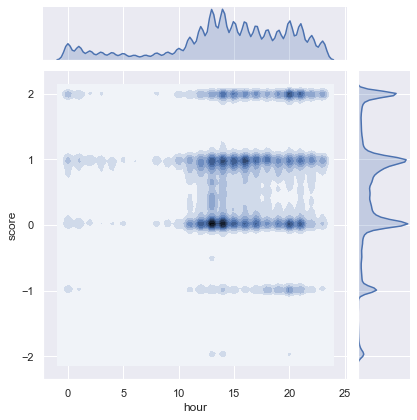

In [13]:
sns.jointplot(x="hour", y="score", data=news, kind="kde", color_palette='hls')

#### Sentiment distribution of ONE WEEK (by day of the week)
* 0 on x-axis is for Monday
* 5 on x-axis is for Saturday

In [ ]:
sns.jointplot(x="weekday", y="score", data=news, kind="hex", color='green')

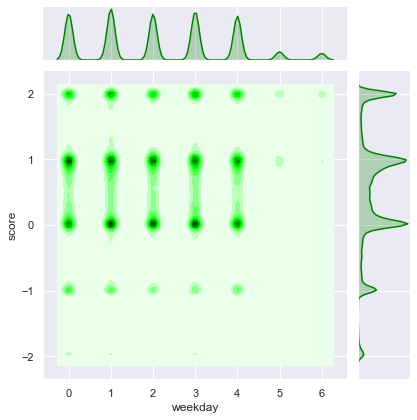

In [22]:
sns.jointplot(x="weekday", y="score", data=news, kind="kde", color='green')

#### Sentiment distribution over ONE MONTH

In [ ]:
sns.jointplot(x="day", y="score", data=news, kind="hex", color='purple')

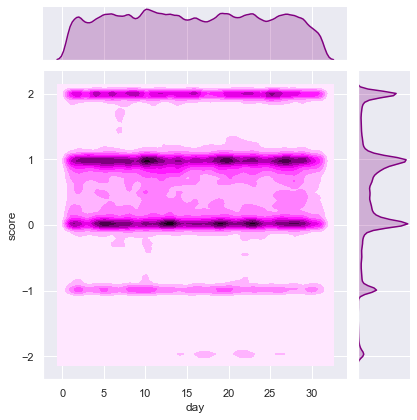

In [24]:
sns.jointplot(x="day", y="score", data=news, kind="kde", color='purple')

#### Sentiment distribution by YEAR

In [ ]:
sns.jointplot(x="year", y="score", data=news, kind="hex", color='pink')

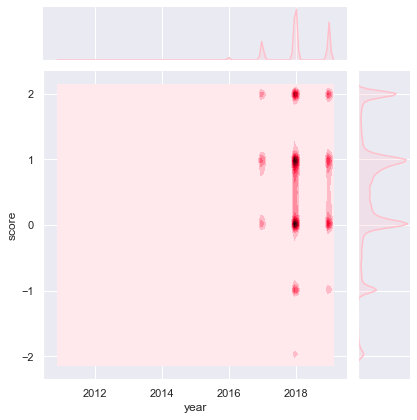

In [26]:
sns.jointplot(x="year", y="score", data=news, kind="kde", color='pink')

Optional: transform news data into series and save as pickle for easy retrieval

In [ ]:
news = news.set_index(['date', 'asset'])
news = news.score

with open('./data/news_sentiment_score.pckl', 'wb') as file:
    dill.dump(news, file)

news.tail()

# Encode news sentiments

In [7]:
rounded_news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
rounded_news = rounded_news.rename(columns = {"date": "datetime"})
rounded_news['datetime']=pd.DatetimeIndex(rounded_news['datetime']).tz_localize(None)
rounded_news['datetime']=pd.DatetimeIndex(rounded_news['datetime']).round('D').date
rounded_news['score'] = rounded_news['score'].apply(lambda x: int(round(x)))
rounded_news.head()

,Unnamed: 0,Unnamed: 0.1,asset,datetime,headline,message_body,score
0,0,NaN,VNET,2019-05-21,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,1
1,1,NaN,VNET,2019-05-18,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",1
2,2,NaN,VNET,2019-05-17,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,1
3,3,NaN,VNET,2019-05-17,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1
4,4,NaN,VNET,2019-05-17,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",1


In [8]:
rounded_news = rounded_news.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'headline','message_body'])
rounded_news.tail()

,asset,datetime,score
1365319,YZCAY,2016-01-08,0
1365320,YZCAY,2015-12-24,1
1365321,YZCAY,2015-12-21,2
1365322,YZCAY,2015-11-20,0
1365323,YZCAY,2015-11-03,0


In [9]:
newsencoded = rounded_news.pivot_table(index= ['datetime', 'asset'], columns = ['score'], aggfunc=len)
newsencoded = newsencoded.rename({-2:'StrongNegative1D', -1: 'WeakNegative1D', 0:'Neutral1D', 1:'WeakPositive1D', 2:'StrongPositive1D'}, axis='columns')
# newsencoded = newsencoded.fillna(0)

with open("./data/newsencoded.pckl", "wb") as f:
    dill.dump(newsencoded, f)

news = newsencoded

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D21783F98>,
      dtype=object)

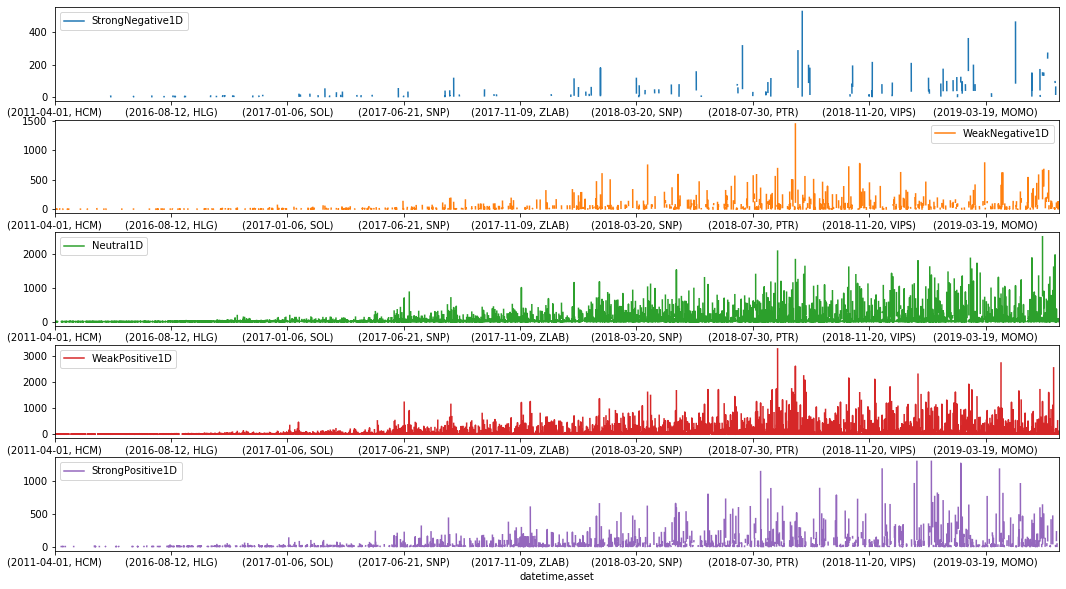

In [10]:
fig, axes = plt.subplots(nrows=5, figsize=(18,10))
newsencoded.plot(ax = axes[:],subplots=True)

# Now merge 20F and 6K cosine similarities

In [11]:
import pickle
def load_pickles():
    
    f = open('./data/sentiments.pckl', 'rb')
    sentiments = pickle.load(f)
    f.close()
    
    f = open('./data/tickerList.pckl', 'rb')
    tickerList= pickle.load(f)
    f.close()
    
    f = open('./data/cosine_similarities_20F.pckl', 'rb')
    cosine_similarities_20F= pickle.load(f)
    f.close()
    
    f = open('./data/cosine_similarities_6K.pckl', 'rb')
    cosine_similarities_6K= pickle.load(f)
    f.close()
    
    f = open('./data/file_dates_20F.pckl', 'rb')
    file_dates_20F = pickle.load(f)
    f.close()
    
    f = open('./data/file_dates_6K.pckl', 'rb')
    file_dates_6K= pickle.load(f)
    f.close()
    
    
    return sentiments, tickerList, cosine_similarities_20F, cosine_similarities_6K, file_dates_20F, file_dates_6K 

sentiments, tickerList, cosine_similarities_20F, cosine_similarities_6K, file_dates_20F, file_dates_6K = load_pickles()

In [12]:
def load_factor_data_20F():
    factors20F = pd.DataFrame()
    d = {}
    for ticker in tickerList:
        for factor in [dict(zip([(date_,ticker) for date_ in file_dates_20F[ticker]], \
                                np.asarray([v for k,v in cosine_similarities_20F[ticker].items()]).T))]:
            d.update(factor)
    factors20F = pd.DataFrame(d, index=sentiments).T
    factors20F.index.set_names(['datetime', 'asset'], inplace=True)
    return factors20F

def load_factor_data_6K():
    factors6K = pd.DataFrame()
    d = {}
    for ticker in tickerList:
        for factor in [dict(zip([(date_,ticker) for date_ in file_dates_6K[ticker]], \
                                np.asarray([v for k,v in cosine_similarities_6K[ticker].items()]).T))]:
            d.update(factor)
    factors6K = pd.DataFrame(d, index=sentiments).T
    factors6K.index.set_names(['datetime', 'asset'], inplace=True)
    factors6K= factors6K.drop_duplicates()
    return factors6K

### Treating quarterly factors

In [13]:
fd_20F = load_factor_data_20F()
fd_20F.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 692 entries, (2019-03-27, VNET) to (2012-04-30, ZAHLY)
Data columns (total 6 columns):
negative        692 non-null float64
positive        692 non-null float64
uncertainty     692 non-null float64
litigious       692 non-null float64
constraining    692 non-null float64
interesting     692 non-null float64
dtypes: float64(6)
memory usage: 38.0+ KB


In [14]:
fd_20F = fd_20F.reset_index().rename({"negative":"negative_Yr", "positive": "positive_Yr", "uncertainty":"uncertainty_Yr", \
                  "litigious": "litigious_Yr", "constraining": "constraining_Yr", \
                   "interesting": "interesting_Y"}, axis="columns")
fd_20F = fd_20F.set_index(["datetime", "asset"])
fd_20F.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y
datetime,asset,,,,,,
2019-03-27,VNET,0.996571,0.995232,0.999520,0.986051,0.996662,0.998904
2018-04-12,VNET,0.993168,0.989786,0.996868,0.985490,0.995370,0.997489
2017-04-12,VNET,0.984623,0.995591,0.999289,0.996604,0.986908,0.985202
2016-04-12,VNET,0.998159,0.992137,0.999152,0.997421,0.997206,0.999518
2015-04-10,VNET,0.991378,0.976363,0.999391,0.992658,0.984905,0.988532


In [15]:
def resample_data(factors,resampletime):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).tz_localize(None)
    #ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).interpolate(method='pchip').
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

def timezoneset(factors):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).tz_localize(None) #.interpolate(method='pchip')
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

In [16]:
resampled20F_1CalDay = resample_data(fd_20F, "C")
resampled20F_1day = resample_data(fd_20F, "B")
resampled20F_monthly = resample_data(fd_20F, "M")
resampled20F_quarterly = resample_data(fd_20F, "Q")
resampled20F_182days = resample_data(fd_20F, "182d")
resampled20F_365days = resample_data(fd_20F, "365d")

In [17]:
fd_20F = timezoneset(fd_20F)

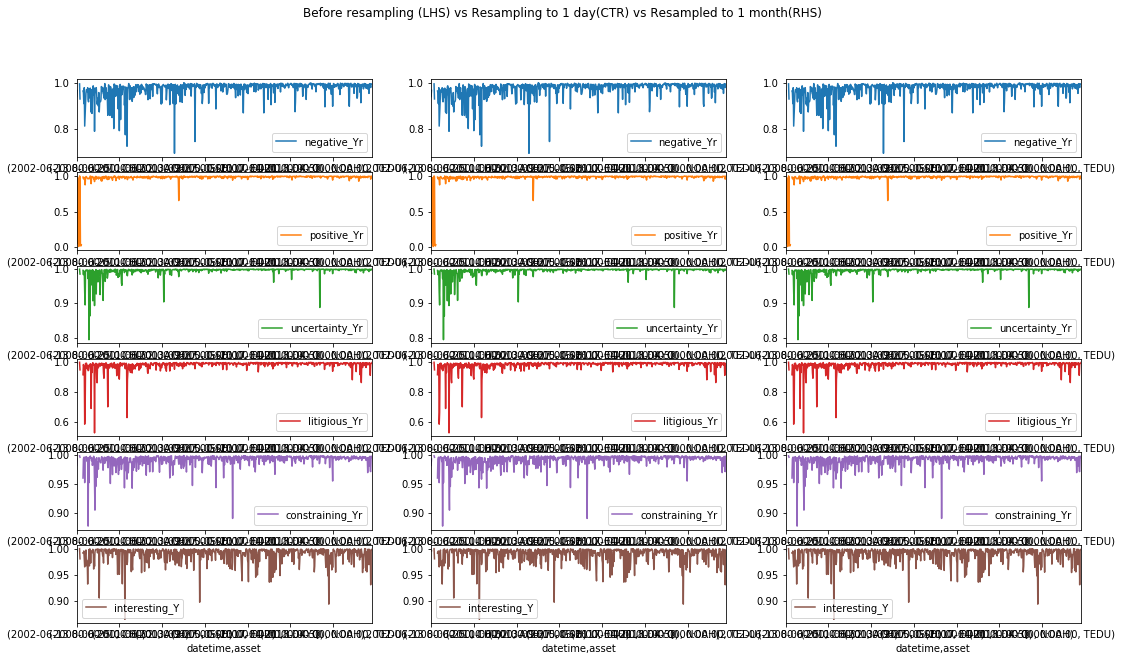

In [18]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))

fd_20F.plot(ax = axes[:,0],subplots=True, title="Before resampling (LHS) vs Resampling to 1 day(CTR) vs Resampled to 1 month(RHS)")
resampled20F_1day.plot(ax = axes[:,1],subplots=True)
resampled20F_monthly.plot(ax = axes[:,2],subplots=True)
plt.show()

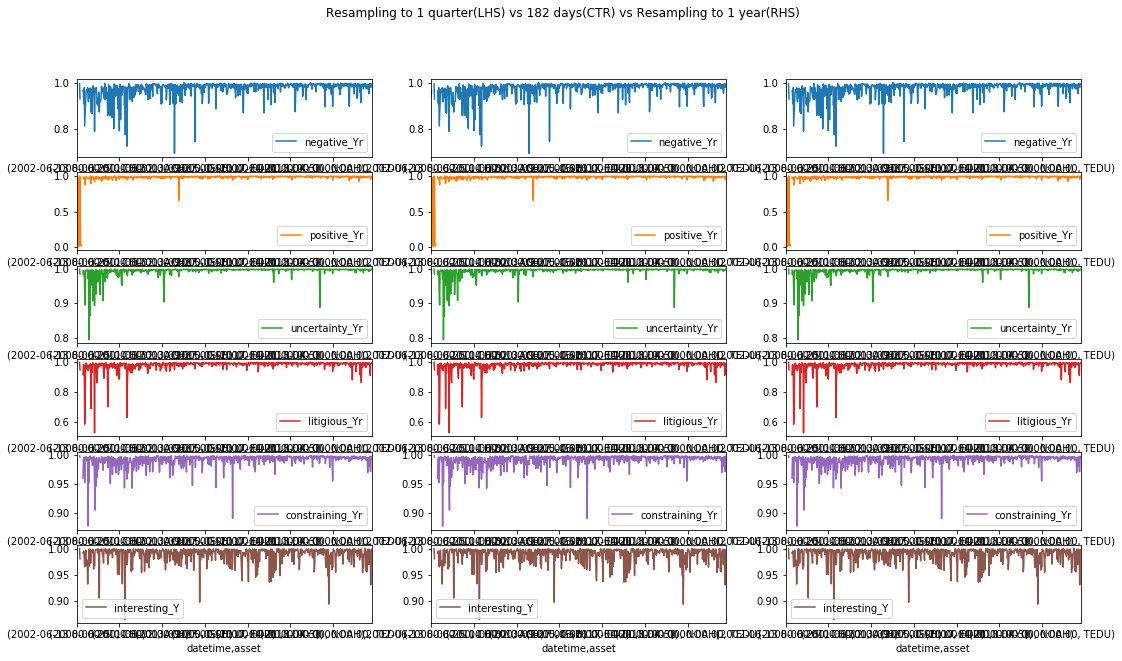

In [19]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
resampled20F_quarterly.plot(ax = axes[:,0],subplots=True)
resampled20F_182days.plot(ax = axes[:,1],subplots=True, title="Resampling to 1 quarter(LHS) vs 182 days(CTR) vs Resampling to 1 year(RHS)")
resampled20F_365days.plot(ax = axes[:,2],subplots=True)
plt.show()

### Treating quarterly factors

In [20]:
fd_6K = load_factor_data_6K()
fd_6K.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2306 entries, (2019-05-17, YI) to (2011-05-19, ZAHLY)
Data columns (total 6 columns):
negative        2306 non-null float64
positive        2306 non-null float64
uncertainty     2306 non-null float64
litigious       2306 non-null float64
constraining    2306 non-null float64
interesting     2306 non-null float64
dtypes: float64(6)
memory usage: 131.4+ KB


In [21]:
fd_6K = fd_6K.reset_index()
fd_6K = fd_6K.rename({"negative":"negative_Qr", "positive": "positive_Qr", "uncertainty":"uncertainty_Qr", \
                  "litigious": "litigious_Qr", "constraining": "constraining_Qr", \
                   "interesting": "interesting_Qr"}, axis="columns")
fd_6K.head()

,datetime,asset,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr
0,2019-05-17,YI,1.000000,0.0,1.0,1.000000,1.000000,0.000000
1,2019-05-16,YI,1.000000,0.0,0.0,1.000000,1.000000,0.000000
2,2019-05-17,VNET,1.000000,0.0,0.0,1.000000,1.000000,0.000000
3,2019-04-01,VNET,0.065197,0.0,0.0,0.178999,0.157097,0.000000
4,2019-03-29,VNET,0.065197,0.0,0.0,0.178999,0.157097,0.973373


In [22]:
fd_6K.datetime = pd.DatetimeIndex(fd_6K.datetime)
fd_6K = fd_6K.set_index(["datetime", "asset"])

In [23]:
resampled6K_1Hr = resample_data(fd_6K, "H")
resampled6K_1Calday = resample_data(fd_6K, "C")
resampled6K_1Bizday = resample_data(fd_6K, "B")
resampled6K_weekly = resample_data(fd_6K, "7d")
resampled6K_monthly = resample_data(fd_6K, "M")
resampled6K_quarterly = resample_data(fd_6K, "Q")
resampled6K_182days = resample_data(fd_6K, "182d")

In [24]:
fd_6K = timezoneset(fd_6K)

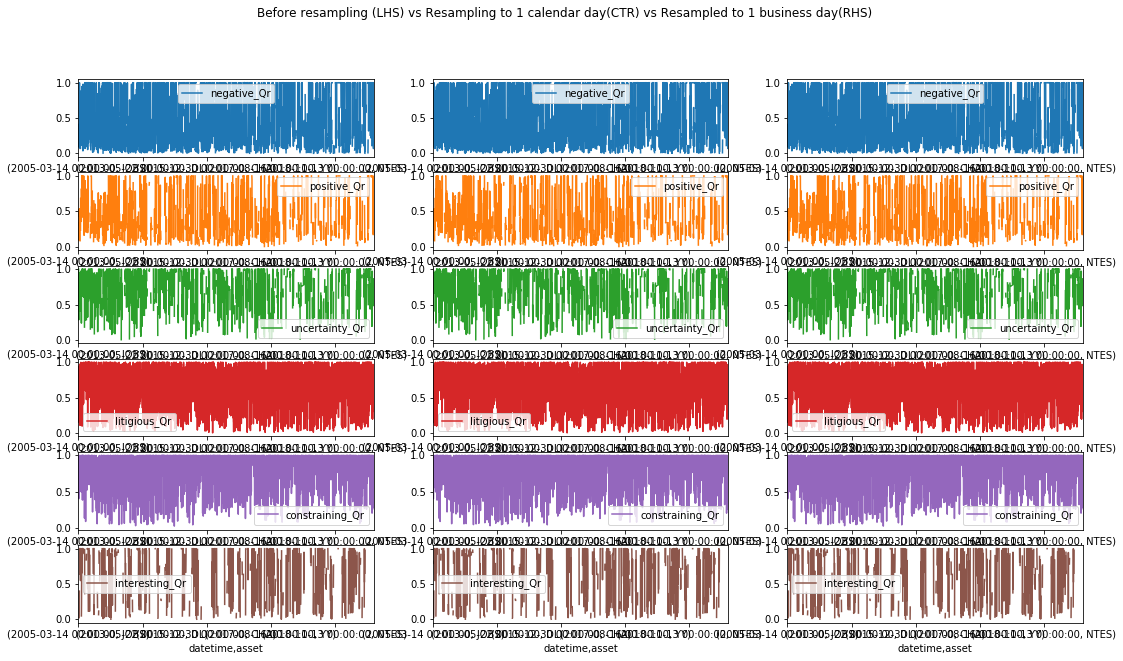

In [25]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
fd_6K.plot(ax = axes[:,0],subplots=True, title="Before resampling (LHS) vs Resampling to 1 calendar day(CTR) vs Resampled to 1 business day(RHS)")
resampled6K_1Calday.plot(ax = axes[:,1],subplots=True)
resampled6K_1Bizday.plot(ax = axes[:,2],subplots=True)
plt.show()

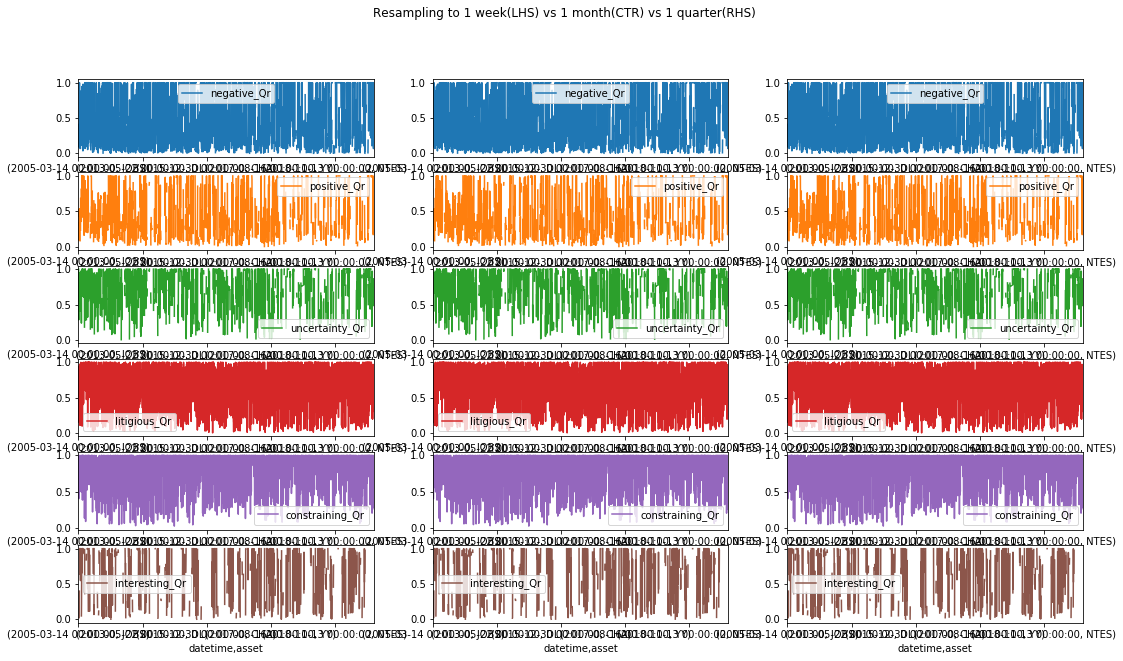

In [26]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
resampled6K_weekly.plot(ax = axes[:,0],subplots=True)
resampled6K_monthly.plot(ax = axes[:,1],subplots=True, title="Resampling to 1 week(LHS) vs 1 month(CTR) vs 1 quarter(RHS)")
resampled6K_quarterly.plot(ax = axes[:,2],subplots=True)
plt.show()

# Decided to not resample the SEC sentiment factors

In [27]:
factors6K = fd_6K
factors20F = fd_20F

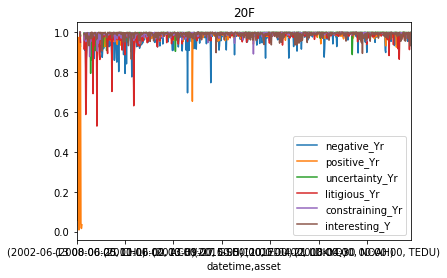

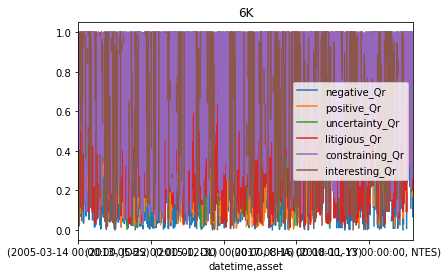

In [28]:
factors20F.plot(title="20F")
factors6K.plot(title="6K")

In [29]:
factors20F.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y
datetime,asset,,,,,,
2002-06-13,CHL,0.940365,0.953912,0.993711,0.990532,0.982694,0.995986
2003-05-13,CEO,0.967035,0.980075,0.987644,0.994199,0.993801,0.995815
2003-06-16,HNP,NaN,0.056585,NaN,NaN,NaN,NaN
2003-06-17,CHL,0.938671,0.973900,0.990295,0.983164,0.983497,0.994052
2003-06-19,SNP,NaN,0.032147,NaN,NaN,NaN,NaN


# Now add in the marketcap as factor

In [35]:
f = open('./data/price.pckl', 'rb')
mc = dill.load(f)
f.close()
mc = pd.DataFrame(mc.marketcap).marketcap
mc = mc.reset_index()
mc['datetime'] = pd.DatetimeIndex(mc['datetime']).tz_localize(None)
mc['datetime'] = pd.DatetimeIndex(mc['datetime']).date
mc = mc.set_index(["datetime", "asset"])
mc.head()

,,marketcap
datetime,asset,
2018-09-12,YI,17969959.80
2018-09-13,YI,9575412.00
2018-09-14,YI,10820523.53
2018-09-17,YI,2685648.84
2018-09-18,YI,3384564.30


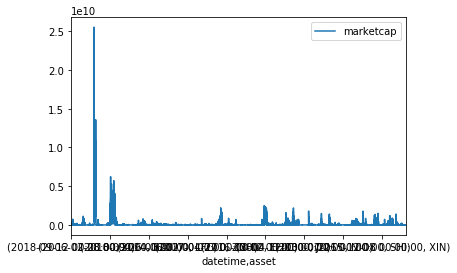

In [36]:
mc.plot()

In [37]:
m1 = pd.merge(factors20F, factors6K, left_index=True, right_index=True, how='outer')
m2 = pd.merge(m1, news, left_index=True, right_index=True, how='outer')
all_factors = pd.merge(m2, mc, left_index=True, right_index=True, how='outer') #.fillna(0)

In [38]:
features = ['negative_Yr', 'positive_Yr', 'uncertainty_Yr', 'litigious_Yr','constraining_Yr', 'interesting_Y',\
            'negative_Qr', 'positive_Qr', 'uncertainty_Qr', 'litigious_Qr', 'constraining_Qr', 'interesting_Qr',\
             'StrongNegative1D', 'WeakNegative1D', 'Neutral1D', 'WeakPositive1D','StrongPositive1D', 'marketcap']

In [39]:
with open("./data/all_factors.pckl", "wb") as f:
    dill.dump(all_factors, f)

# START HERE TO WORK WITH CLEAN VERSION OF RAW FACTORS

In [40]:
# To SAVE
clean_factorsOnly = all_factors.copy()
# To RETRIEVE
all_factors = clean_factorsOnly

# Factor quantile calculation

In [41]:
all_factors.reset_index()

,datetime,asset,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr,StrongNegative1D,WeakNegative1D,Neutral1D,WeakPositive1D,StrongPositive1D,marketcap
0,1991-09-20,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068301e+06
1,1991-09-23,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.498206e+05
2,1991-09-24,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.299597e+05
3,1991-09-25,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.024013e+05
4,1991-09-26,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.929870e+05
5,1991-09-27,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.415060e+05
6,1991-09-30,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.573834e+05
7,1991-10-01,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.881060e+05
8,1991-10-02,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.090788e+05
9,1991-10-03,NIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.990351e+05


In [42]:
_quantiles = 5
# allfactorquantiles = pd.DataFrame()
type(pos_quantiles)

NameError: name 'pos_quantiles' is not defined

In [44]:
for i in features:
    x = all_factors[i]
    pos_quantiles=pd.qcut(x,2,labels=None,duplicates='drop')
#     pos_quantiles=pd.DataFrame(pos_quantiles)+3
   # pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

In [46]:
for i in features:
    x = all_factors[i]
    pos_quantiles=pd.qcut(x,2,labels=None,duplicates='drop')
    pos_quantiles=pd.DataFrame(pos_quantiles+3)
   # pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

TypeError: Series cannot perform the operation +

In [129]:
for i in features:
    x = all_factors[i]
    quantile_plus1=pd.qcut(x, 5, labels=False)+1

In [130]:
quantile_plus1

datetime                   asset
2002-06-13 00:00:00+00:00  CHL     NaN
2003-05-13 00:00:00+00:00  CEO     NaN
2003-06-16 00:00:00+00:00  HNP     NaN
2003-06-17 00:00:00+00:00  CHL     NaN
2003-06-19 00:00:00+00:00  SNP     NaN
2003-06-23 00:00:00+00:00  ACH     NaN
                           CHU     NaN
2003-06-25 00:00:00+00:00  ACH     NaN
                           PTR     NaN
2003-06-26 00:00:00+00:00  CEA     NaN
                           GSH     NaN
2003-06-27 00:00:00+00:00  NTES    NaN
                           YZCAY   NaN
2003-06-30 00:00:00+00:00  SHI     NaN
                           ZNH     NaN
2004-03-31 00:00:00+00:00  CHA     NaN
2004-04-16 00:00:00+00:00  HNP     NaN
2004-06-17 00:00:00+00:00  CHL     NaN
                           SHI     NaN
2004-06-22 00:00:00+00:00  SNP     NaN
2004-06-23 00:00:00+00:00  CEO     NaN
2004-06-24 00:00:00+00:00  CHU     NaN
2004-06-28 00:00:00+00:00  CEA     NaN
                           PTR     NaN
2004-06-29 00:00:00+00:00  GSH 

In [ ]:


pos_quantiles = pd.qcut(x[x >= 0], _quantiles // 2, labels=False)\
                    + _quantiles // 2 + 1

neg_quantiles = pd.qcut(x[x < 0], _quantiles // 2, labels=False) + 1

pd.concat([pos_quantiles, neg_quantiles]).sort_index()

pd.qcut(x, _quantiles, labels=False) + 1

pos_quantiles = pd.qcut(x[x >= 0], _quantiles // 2, labels=False) + _quantiles // 2 + 1

neg_quantiles = pd.qcut(x[x < 0], _quantiles // 2, labels=False) + 1

pd.concat([pos_quantiles, neg_quantiles]).sort_index()

pd.cut(x, _bins, labels=False) + 1
            elif _bins is not None and _quantiles is None and _zero_aware:
                pos_bins = pd.cut(x[x >= 0], _bins // 2,
                                  labels=False) + _bins // 2 + 1
                neg_bins = pd.cut(x[x < 0], _bins // 2,
                                  labels=False) + 1
                return pd.concat([pos_bins, neg_bins]).sort_index()
        except Exception as e:
            if _no_raise:
                return pd.Series(index=x.index)
            raise e

In [ ]:
 grouper = [factor_data.index.get_level_values('date')]
    if by_group:
        grouper.append('group')

In [ ]:
from alphalens.utils import get_clean_factor_and_forward_returns
get_clean_factor_and_forward_returns(all_factors, price,filter_zscore=None,max_loss=50,periods=[1])

# Calculating trailing returns

In [62]:
#makes a copy of factors
clean_factorsOnly = all_factors.copy()

In [144]:
#revert to this setpoint
all_factors=clean_factorsOnly.copy()

In [262]:
f = open('./data/price.pckl', 'rb')
price= dill.load(f)
f.close()

price = pd.DataFrame(price.adj_close).adj_close
price = price.reset_index()
price['datetime'] = pd.DatetimeIndex(price['datetime']).tz_localize(None)
price = price.set_index(["datetime", "asset"])

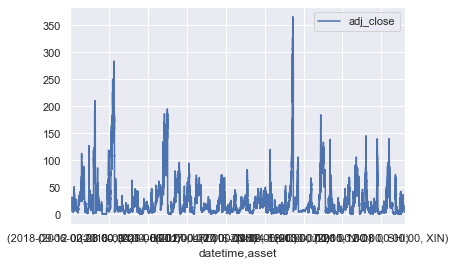

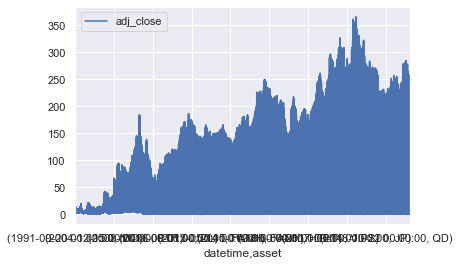

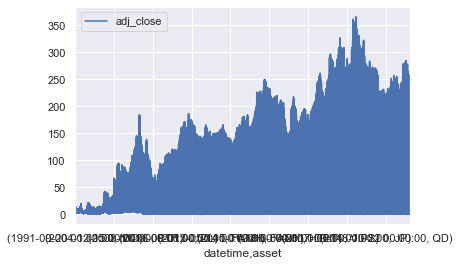

In [263]:
def resample_price_data(factors,resampletime):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).asfreq(resampletime)
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

price_resampledB =resample_price_data(price, "B")
price_resampledC =resample_price_data(price, "C")

price.plot()
price_resampledB.plot()
price_resampledC.plot()

It was decided to resample price as frequency C

### Shift Target
We'll use shifted 5 day returns for training the model.

In [296]:
price['price']=price.groupby(level='asset')['adj_close'].fillna(method='ffill').fillna(method='bfill')

price['return_1d'] = price.groupby(level='asset')['adj_close'].pct_change(1).fillna(method='ffill').fillna(method='bfill')
price['forward_return_1d']= price['return_1d'].shift(-1)

price['return_5d'] = price.groupby(level='asset')['adj_close'].pct_change(5).fillna(method='ffill').fillna(method='bfill')
price['forward_return_5d']= price['return_5d'].shift(-5)

price['return_15d'] = price.groupby(level='asset')['adj_close'].pct_change(15).fillna(method='ffill').fillna(method='bfill')
price['forward_return_15d']= price['return_15d'].shift(-15)

price['return_30d'] = price.groupby(level='asset')['adj_close'].pct_change(30).fillna(method='ffill').fillna(method='bfill')
price['forward_return_30d']= price['return_30d'].shift(-30)

price['return_90d'] = price.groupby(level='asset')['adj_close'].pct_change(90).fillna(method='ffill').fillna(method='bfill')
price['forward_return_30d']= price['return_30d'].shift(-90)

price['return_165d'] = price.groupby(level='asset')['adj_close'].pct_change(165).fillna(method='ffill').fillna(method='bfill')
price['forward_return_165d']= price['return_165d'].shift(-165)

price['target']=price['forward_return_15d']
y= price['target']

In [297]:
price.head()

,,adj_close,return_1d,forward_return_1d,return_5d,forward_return_5d,return_15d,forward_return_15d,return_30d,forward_return_30d,return_90d,return_165d,forward_return_165d,target,price
datetime,asset,,,,,,,,,,,,,,
2018-09-12,YI,13.80,0.014493,0.014493,0.001449,0.001449,-0.176449,-0.176449,-0.413043,0.075697,-0.413043,-0.419565,-0.419565,-0.176449,13.80
2018-09-13,YI,14.00,0.014493,-0.000714,0.001449,-0.035000,-0.176449,-0.228571,-0.413043,0.173333,-0.413043,-0.419565,-0.425714,-0.228571,14.00
2018-09-14,YI,13.99,-0.000714,-0.019299,0.001449,0.103645,-0.176449,-0.133667,-0.413043,0.242857,-0.413043,-0.419565,-0.417441,-0.133667,13.99
2018-09-17,YI,13.72,-0.019299,-0.048105,0.001449,0.079446,-0.176449,-0.151603,-0.413043,0.212514,-0.413043,-0.419565,-0.398324,-0.151603,13.72
2018-09-18,YI,13.06,-0.048105,0.058193,0.001449,0.077335,-0.176449,-0.146248,-0.413043,0.378626,-0.413043,-0.419565,-0.354900,-0.146248,13.06


Note on Trailing Returns:
A trailing return looks backward from a particular date for a fund's annualized return over a specific time period--usually ending on the last day of the most recent day, month, quarter, or year. Note that dividend has been considered in the adjusted close price. The adjusted closing price shows the stock's value after posting a dividend. For example, if a share with a closing price of $100 paid a $5 dividend per share, the adjusted closing price would be $95 in order to account for the newly reduced value caused by the dividend.

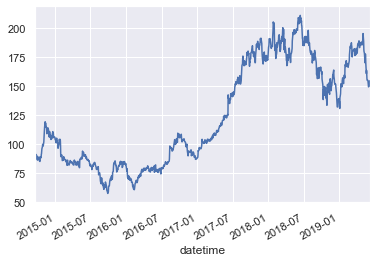

In [339]:
price.adj_close.loc[:,'BABA'].plot()
# price.forward_return_165d.loc[:,'BABA'].plot()

In [298]:
#save a checkpoint
with open ("./data/trailing_return.pckl", "wb") as f:
    dill.dump(price, f)

To predict the go forward 1-week return, it's important to quantize the target. The factor we create is the trailing 5-day return.

In [266]:
#visual verification of the calculations

# idx = pd.IndexSlice
# price.loc[idx[:,'YI'],['daily_return','forward_return_1d']].plot()

## (price_non.loc[idx[:,['BIDU','BABA']]]-price.loc[idx[:,['BIDU','BABA']],'daily_return']).plot()

##### Merge target with features

In [299]:
all_factors=pd.merge(all_factors, price[['price', 'target', 'return_15d']], left_index=True, right_index=True, how='outer').fillna(0)

In [300]:

all_factors.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,...,WeakPositive1D,StrongPositive1D,marketcap,target_x,return_15d_x,target_y,return_15d_y,price,target,return_15d
datetime,asset,,,,,,,,,,,,,,,,,,,,,
1991-09-20,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.068301e+06,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-23,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.498206e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-24,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.299597e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-25,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.024013e+05,0.000,0.039828,0.000,0.039828,5.498206,0.000,0.039828
1991-09-26,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.929870e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828


# Using alphalens

In [ ]:
# all_factors[i].groupby(['datetime'])['asset'].count().to_frame().rename(columns=[i]).reset_index()

In [334]:
af = all_factors[i].copy().fillna(0)
af = af.reset_index()
af.datetime = pd.DatetimeIndex(af.datetime).tz_localize('UTC')
af = af.set_index("datetime", "asset")
af.remove_unused_levels()
af.head()

ap = all_factors['price'].copy().fillna(0)
ap = ap.reset_index()
ap.datetime = pd.DatetimeIndex(ap.datetime).tz_localize('UTC')
ap = ap.set_index("datetime", "asset")
af.remove_unused_levels()
ap.head()

AttributeError: 'DataFrame' object has no attribute 'remove_unused_levels'

In [ ]:
alphalensfactors.datetime = pd.DatetimeIndex(alphalensfactors.)

In [331]:
af.index.tz

<UTC>

In [332]:
af.index.levels[0]

AttributeError: 'DatetimeIndex' object has no attribute 'levels'

In [328]:
from alphalens.utils import get_clean_factor_and_forward_returns
# for i in features:
i = 'negative_Yr'
get_clean_factor_and_forward_returns(af, ap, filter_zscore=None, max_loss=50)

AttributeError: 'DatetimeIndex' object has no attribute 'levels'

In [269]:
p_df = pd.DataFrame()
coe_df = pd.DataFrame()

for i in features:
    p_df[i] = spearmanr(all_factors[i], all_factors['target'], axis=1)

In [270]:
p_df

,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr,StrongNegative1D,WeakNegative1D,Neutral1D,WeakPositive1D,StrongPositive1D
0,-0.003169,-0.002419,-0.003172,-0.003172,-0.003176,-0.003170,0.001255,0.001562,0.001533,-0.001166,-0.001144,0.003588,-0.002028,-0.002651,-0.006111,-1.097743e-02,-0.000722
1,0.137565,0.257128,0.137253,0.137257,0.136804,0.137458,0.556520,0.464330,0.472538,0.584842,0.592053,0.092747,0.342120,0.214278,0.004197,2.699599e-07,0.735100


In [271]:
factor = all_factors.copy()
factor.reset_index().to_csv('./data/all_factors.csv')

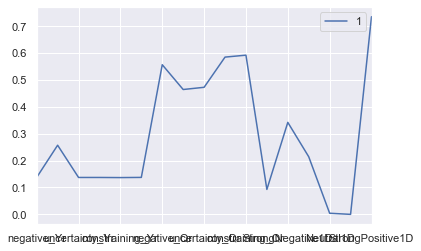

In [272]:
pd.DataFrame(p_df.loc[1,:]).plot()

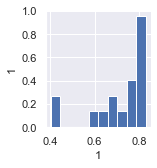

In [99]:
import abc

from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from cesklearn.preprossing import LabelEncoder
from sklearn.utils import Bunch


class NoOverlapVoterAbstract(VotingClassifier):
    @abc.abstractmethod
    def _calculate_oob_score(self, classifiers):
        raise NotImplementedError
        
    @abc.abstractmethod
    def _non_overlapping_estimators(self, x, y, classifiers, n_skip_samples):
        raise NotImplementedError
    
    def __init__(self, estimator, voting='soft', n_skip_samples=4):
        # List of estimators for all the subsets of data
        estimators = [('clf'+str(i), estimator) for i in range(n_skip_samples + 1)]
        
        self.n_skip_samples = n_skip_samples
        super().__init__(estimators, voting)
    
    def fit(self, X, y, sample_weight=None):
        estimator_names, clfs = zip(*self.estimators)
        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        
        clone_clfs = [clone(clf) for clf in clfs]
        self.estimators_ = self._non_overlapping_estimators(X, y, clone_clfs, self.n_skip_samples)
        self.named_estimators_ = Bunch(**dict(zip(estimator_names, self.estimators_)))
        self.oob_score_ = self._calculate_oob_score(self.estimators_)
        
        return self

### Check for return independence and identical distribution

In [112]:
def sp(group, col1_name, col2_name):
    x = group[col1_name]
    y = group[col2_name]
    return spearmanr(x, y)[0]

In [113]:
all_factors['target_1'] = all_factors.groupby(level=1)['return_15d'].shift(-4)
all_factors['target_2'] = all_factors.groupby(level=1)['return_15d'].shift(-3)
all_factors['target_3'] = all_factors.groupby(level=1)['return_15d'].shift(-2)
all_factors['target_4'] = all_factors.groupby(level=1)['return_15d'].shift(-1)

In [114]:
g = all_factors.dropna().groupby(level=0)
for i in range(4):
    label = 'target_'+str(i+1)
    ic = g.apply(sp, 'target', label)
    ic.plot(ylim=(-1, 1), label=label)

plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title('Rolling Autocorrelation of Labels Shifted 1,2,3,4 Days')
plt.show()

TypeError: Cannot compare tz-naive and tz-aware timestamps

In [ ]:
# all_factors['target_p'] = all_factors.groupby(level=1)['return_5d_p'].shift(-5)
# return_5d is usually calculated with quantiles(2) whereas 'return_5d_p' is calculated with quantiles(25)?

### Train/Valid/Test Splits for Multi-index dataframes - must not split between any day
Custom splitting is necessary to ensure there is no spliting of data on a particular day. The `train_size` is 0.7, `valid_size` is 0.2, and `test_size` is 0.1. The first 70 percent of `all_x` and `all_y` would be the train set. The next 20 percent of `all_x` and `all_y` would be the validation set. The last 10 percent of `all_x` and `all_y` would be the test set.

In [1284]:
def train_valid_test_split(all_x, all_y, train_size, valid_size, test_size):

    assert train_size >= 0 and train_size <= 1.0
    assert valid_size >= 0 and valid_size <= 1.0
    assert test_size >= 0 and test_size <= 1.0
    assert train_size + valid_size + test_size == 1.0

    train_length = int(len(all_x.index.levels[0])*train_size)
    valid_length = int(len(all_x.index.levels[0])*valid_size)
    train_indexes = all_x.index.levels[0][:train_length]
    valid_indexes = all_x.index.levels[0][train_length:train_length+valid_length]
    test_indexes = all_x.index.levels[0][train_length+valid_length:]
    
    x_train = all_x.loc[train_indexes[0]:train_indexes[-1]]
    x_valid = all_x.loc[valid_indexes[0]:valid_indexes[-1]]
    x_test = all_x.loc[test_indexes[0]:test_indexes[-1]]
    
    y_train = all_y.loc[train_indexes[0]:train_indexes[-1]]
    y_valid = all_y.loc[valid_indexes[0]:valid_indexes[-1]]
    y_test = all_y.loc[test_indexes[0]:test_indexes[-1]]
    
    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [1286]:
target_label = 'target'
temp = all_factors.dropna().copy()
X = temp[features]
y = temp[target_label]

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y, 0.6, 0.2, 0.2)

X_train.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr,StrongNegative1D,WeakNegative1D,Neutral1D,WeakPositive1D,StrongPositive1D
datetime,asset,,,,,,,,,,,,,,,,,
1991-09-20,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-23,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-24,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-25,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-26,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


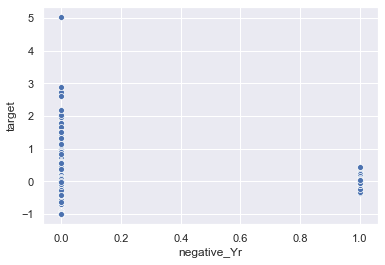

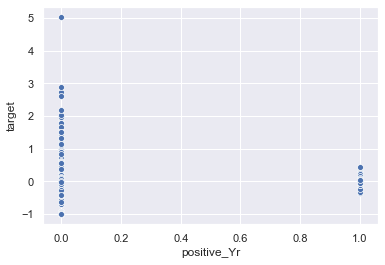

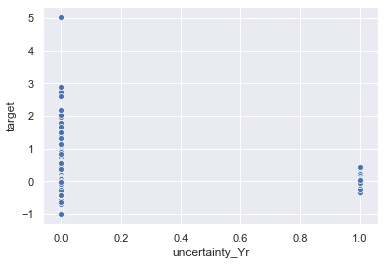

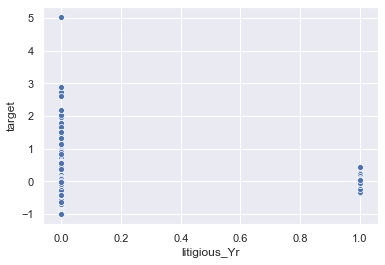

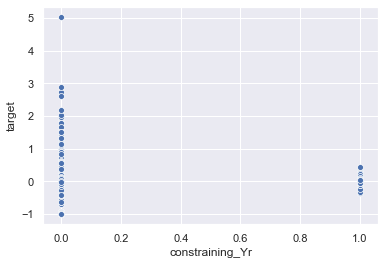

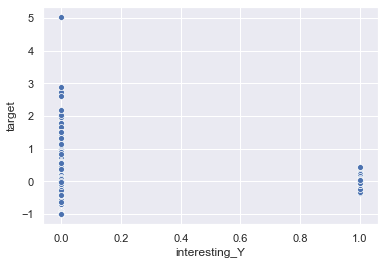

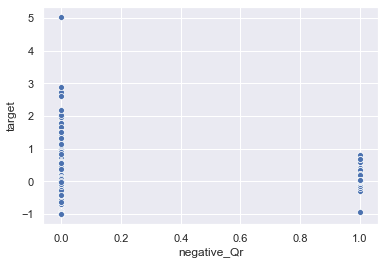

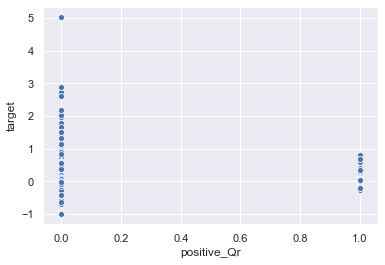

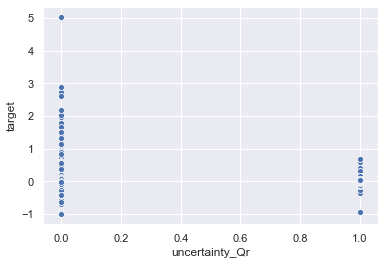

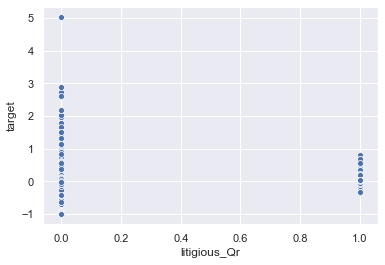

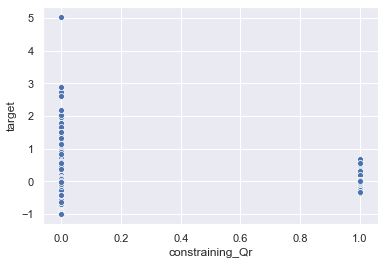

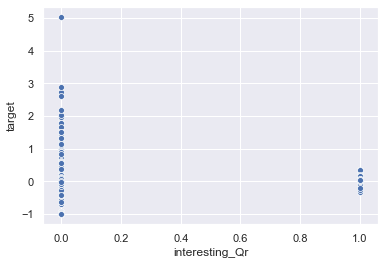

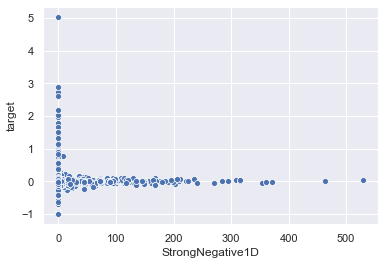

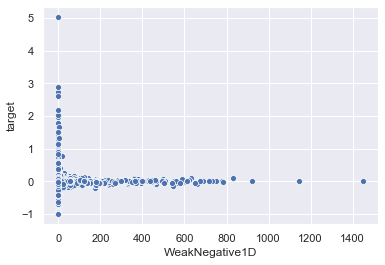

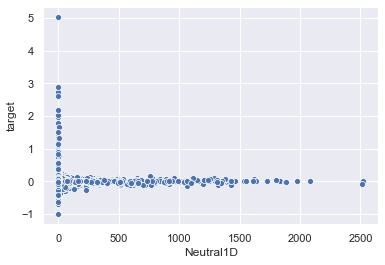

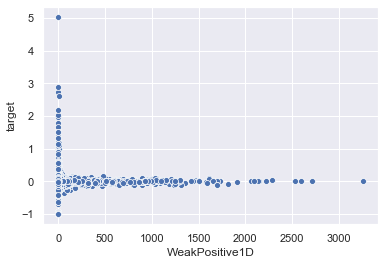

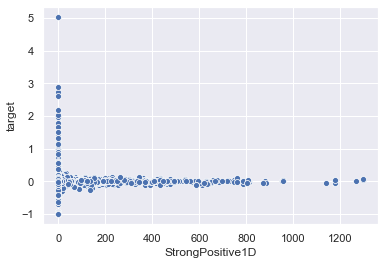

In [1249]:
for i in features:
    sns.scatterplot(x=i, y='target', data=all_factors)
    plt.show()

## Random Forests
### Visualize a Simple Tree

In [1291]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return Image(graphviz.Source(dot_data).pipe(format='png'))

In [1292]:
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
clf_random_state = 0 # This is to get consistent results between each run.

simple_clf = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=clf_random_state)
simple_clf.fit(X_train, y_train)

display(plot_tree_classifier(simple_clf, feature_names=features))
rank_features_by_importance(simple_clf.feature_importances_, features)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

# Random Forest to trial different tree sizes

In [1299]:
n_days = 10
n_stocks = 110

clf_parameters = {
    'criterion': 'entropy',
    'min_samples_leaf': n_stocks * n_days,
    'oob_score': True,
    'n_jobs': -1,
    'random_state': clf_random_state}
n_trees_l = [50, 100, 250, 500, 1000]

In [1300]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

train_score = []
valid_score = []
oob_score = []
feature_importances = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(X_train, y_train)
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)
    feature_importances.append(clf.feature_importances_)

Training Models: 100%|██████████| 5/5 [00:17<00:00,  4.19s/Model]


To plot model results

In [1301]:
plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

NameError: name 'plot' is not defined

In [1302]:
def rank_features_by_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))

    for x_train_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=x_train_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[x_train_i]],
            importance=importances[indices[x_train_i]]))

In [1303]:
print('Features Ranked by Average Importance:\n')
rank_features_by_importance(np.average(feature_importances, axis=0), features)

Features Ranked by Average Importance:

      Feature              Importance
 1. StrongPositive1D (0.0)
 2. positive_Qr      (0.0)
 3. positive_Yr      (0.0)
 4. uncertainty_Yr   (0.0)
 5. litigious_Yr     (0.0)
 6. constraining_Yr  (0.0)
 7. interesting_Y    (0.0)
 8. negative_Qr      (0.0)
 9. uncertainty_Qr   (0.0)
10. WeakPositive1D   (0.0)
11. litigious_Qr     (0.0)
12. constraining_Qr  (0.0)
13. interesting_Qr   (0.0)
14. StrongNegative1D (0.0)
15. WeakNegative1D   (0.0)
16. Neutral1D        (0.0)
17. negative_Yr      (0.0)


Some of the features of low to no importance. We will be removing them when training the final model.
### Model Results
Let's look at some additional metrics to see how well a model performs. The following are used to examine the model:
- Sharpe Ratios
- Factor Returns
- Factor Rank Autocorrelation

In [1304]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from IPython.display import display
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1305]:
m = RandomForestRegressor(n_estimators=1, #make a single tree for the forest
                         max_depth=3, #make a small tree
                         bootstrap=False, #turn off randomising
                         n_jobs=-1)
m.fit(X_train, y_train)
print_score(m) #print R2

NameError: name 'print_score' is not defined

# Portfolio optimisation

In [126]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

f = open('./data/price.pckl', 'rb')
price= dill.load(f)
f.close()

price = pd.DataFrame(price.adj_close).adj_close
price = price.reset_index()
price['datetime'] = pd.DatetimeIndex(price['datetime'])
price = price.set_index(["datetime", "asset"]).stack()


# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(price)
S = risk_models.sample_cov(price)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{0: 1.0}
Expected annual return: 31571.9%
Annual volatility: 917850.4%
Sharpe Ratio: 0.03


(315.71946593096214, 9178.503778712684, 0.03439552606200921)

### MASUMS CODE 
(sucks!)

In [ ]:
# To RETRIEVE
all_factors = clean_factorsOnly
# all_factors = all_factors.groupby('asset').apply(lambda x : x.groupby('datetime').mean())

all_factors = all_factors.swaplevel().unstack()
all_factors.head()

all_factors =  pf.utils.to_utc(all_factors.set_index(pd.to_datetime(all_factors.index))).stack()

In [512]:
news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
news.head()

,Unnamed: 0,Unnamed: 0.1,asset,date,headline,message_body,score
0,0,NaN,VNET,2019-05-21 00:41:15+00:00,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,1.073536
1,1,NaN,VNET,2019-05-17 15:44:20+00:00,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",1.073536
2,2,NaN,VNET,2019-05-17 08:23:14+00:00,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,1.073536
3,3,NaN,VNET,2019-05-16 20:43:27+00:00,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1.073536
4,4,NaN,VNET,2019-05-16 20:30:00+00:00,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",1.073536


In [513]:
news = news.reset_index().drop(columns=['index','Unnamed: 0', 'Unnamed: 0.1'])

In [514]:
news.head()

,asset,date,headline,message_body,score
0,VNET,2019-05-21 00:41:15+00:00,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,1.073536
1,VNET,2019-05-17 15:44:20+00:00,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",1.073536
2,VNET,2019-05-17 08:23:14+00:00,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,1.073536
3,VNET,2019-05-16 20:43:27+00:00,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1.073536
4,VNET,2019-05-16 20:30:00+00:00,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",1.073536


In [501]:
news = news.set_index([pd.to_datetime(news.date),'asset'])['score']
# news.set_index())

In [502]:
resampled_news = news.groupby(['date','asset']).skew().sort_index(level=1)

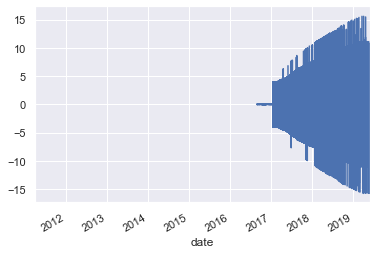

In [487]:
resampled_news.unstack()['BABA'].plot()

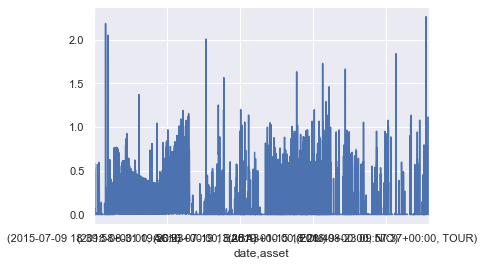

In [488]:
news.groupby(['date','asset']).std().sort_index(level=1).plot()

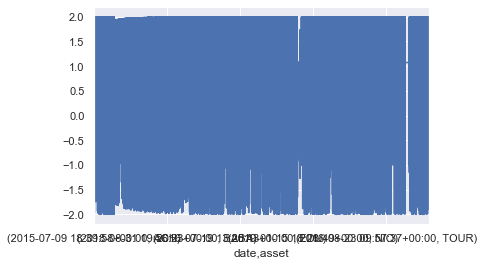

In [489]:
news.groupby(['date','asset']).mean().sort_index(level=1).plot()

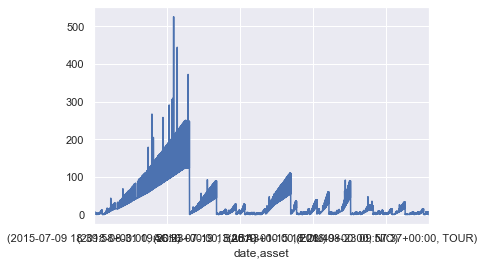

In [503]:
news.groupby(['date','asset']).count().sort_index(level=1).plot()

In [504]:
newsmedian_factor=news.groupby(['date','asset']).median().sort_index(level=1)

In [505]:
newsmean_factor=news.groupby(['date','asset']).mean().sort_index(level=1)

In [506]:
newscount_factor=news.groupby(['date','asset']).count().sort_index(level=1)